In [1]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

In [2]:
#To read csv file
df=pd.read_csv('fer2013.csv')

#Training the model
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


In [3]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 70
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [4]:
#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [5]:
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolation layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

In [6]:
# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [7]:
#Training the model
history= model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


Epoch 1/70
449/449 [==============================] - 373s 826ms/step - loss: 1.8046 - accuracy: 0.2492 - val_loss: 1.5958 - val_accuracy: 0.3461
Epoch 2/70
449/449 [==============================] - 355s 791ms/step - loss: 1.5594 - accuracy: 0.3817 - val_loss: 1.4217 - val_accuracy: 0.4405
Epoch 3/70
449/449 [==============================] - 368s 820ms/step - loss: 1.4314 - accuracy: 0.4423 - val_loss: 1.3295 - val_accuracy: 0.4778
Epoch 4/70
449/449 [==============================] - 390s 869ms/step - loss: 1.3565 - accuracy: 0.4737 - val_loss: 1.2824 - val_accuracy: 0.5093
Epoch 5/70
449/449 [==============================] - 391s 871ms/step - loss: 1.3046 - accuracy: 0.4955 - val_loss: 1.2681 - val_accuracy: 0.5188
Epoch 6/70
449/449 [==============================] - 379s 845ms/step - loss: 1.2736 - accuracy: 0.5077 - val_loss: 1.2510 - val_accuracy: 0.5244
Epoch 7/70
449/449 [==============================] - 341s 761ms/step - loss: 1.2270 - accuracy: 0.5312 - val_loss: 1.2075 -

Epoch 57/70
449/449 [==============================] - 221s 493ms/step - loss: 0.6817 - accuracy: 0.7450 - val_loss: 1.3359 - val_accuracy: 0.5642
Epoch 58/70
449/449 [==============================] - 220s 489ms/step - loss: 0.6566 - accuracy: 0.7553 - val_loss: 1.3126 - val_accuracy: 0.5754
Epoch 59/70
449/449 [==============================] - 221s 492ms/step - loss: 0.6712 - accuracy: 0.7506 - val_loss: 1.3156 - val_accuracy: 0.5798
Epoch 60/70
449/449 [==============================] - 219s 488ms/step - loss: 0.6539 - accuracy: 0.7573 - val_loss: 1.3291 - val_accuracy: 0.5687
Epoch 61/70
449/449 [==============================] - 221s 492ms/step - loss: 0.6390 - accuracy: 0.7601 - val_loss: 1.3804 - val_accuracy: 0.5762
Epoch 62/70
449/449 [==============================] - 219s 489ms/step - loss: 0.6549 - accuracy: 0.7563 - val_loss: 1.3090 - val_accuracy: 0.5832
Epoch 63/70
449/449 [==============================] - 220s 489ms/step - loss: 0.6417 - accuracy: 0.7568 - val_loss: 1

In [20]:
def plotgraph(epochs,val_acc):
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [21]:
val_acc = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(1,len(loss)+1)

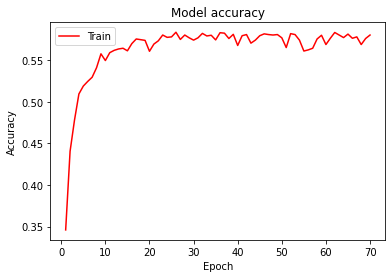

In [22]:
import matplotlib.pyplot as plt
plotgraph(epochs, val_acc)

In [16]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("ferNew.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("ferNew.h5")
